In [2]:
import ser
from ser.data import load_data, load_data_TESS
from ser.trainer import Trainer

In [11]:
observed_emotions=['calm', 'happy', 'sad', 'angry', 'fearful', 'disgust']

In [14]:
x_tess, y_tess = load_data_TESS()

In [15]:
x_rav, y_rav = load_data(observed_emotions=observed_emotions)

/home/iases/.pyenv/versions/3.8.6/envs/ser_proj/lib/python3.8/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


In [16]:
len(x_rav)

1152

In [17]:
trainer = Trainer(x=x_rav, y=y_rav)
trainer.base_model()
trainer.run()

In [18]:
baseline, acc_score, prec_score = trainer.evaluate(x_tess, y_tess)
print(f"baseline: {baseline}")
print(f"model's accuracy score: {acc_score}")
print(f"model's precision score: {prec_score}")

baseline: 0.16666666666666666
model's accuracy score: 0.334
model's precision score: 0.24599647294584948


   angry  calm  disgust  fearful  happy   sad prediction actual
0  94.26   0.0     0.00     5.74   0.00  0.00      angry  angry
1  98.87   0.0     0.00     0.61   0.51  0.01      angry  angry
2  99.98   0.0     0.00     0.00   0.02  0.00      angry  angry
3  72.89   0.0     0.00    26.93   0.17  0.00      angry  angry
4   9.00   0.0     0.01    90.97   0.00  0.02    fearful  angry
              precision    recall  f1-score   support

       angry       0.56      0.62      0.59       400
        calm       0.00      0.00      0.00       400
     disgust       0.36      0.26      0.30       400
     fearful       0.18      0.66      0.28       200
       happy       0.00      0.00      0.00       400
         sad       0.38      0.92      0.54       200

    accuracy                           0.33      2000
   macro avg       0.25      0.41      0.28      2000
weighted avg       0.24      0.33      0.26      2000



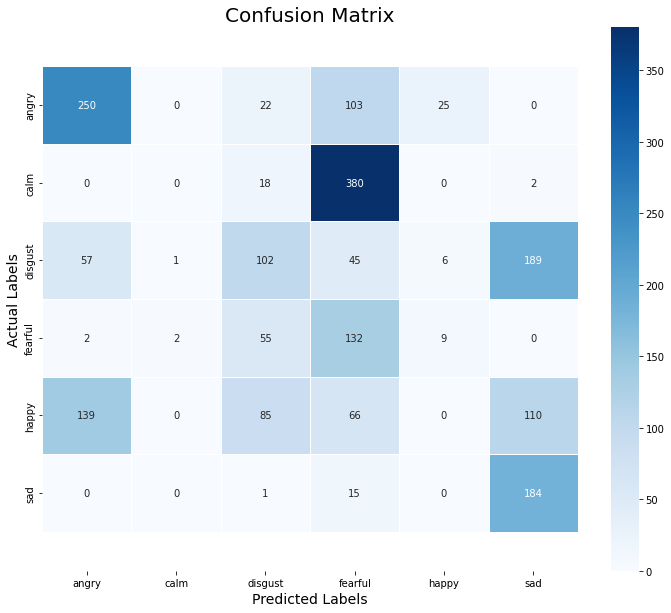

In [20]:
print(trainer.predict_probs(x_tess, y_tess, observed_emotions).head())
trainer.confidence_report(x_tess, y_tess, observed_emotions)
trainer.confusion_matrix(x_tess, y_tess, observed_emotions)

In [28]:
from sklearn.model_selection import train_test_split
import numpy as np

x_tess_train, x_tess_test, y_tess_train, y_tess_test = train_test_split(np.array(x_tess),
                                                    y_tess,
                                                    test_size=0.5,
                                                    shuffle=True,
                                                    random_state=9)

In [35]:
x_train = np.concatenate((x_rav, x_tess_train))
y_train = np.concatenate((y_rav, y_tess_train))

In [36]:
y_train.shape

(2152,)

In [37]:
trainer = Trainer(x=x_train, y=y_train)
trainer.base_model()
trainer.run()

In [38]:
baseline, acc_score, prec_score = trainer.evaluate(x_tess_test, y_tess_test)
print(f"baseline: {baseline}")
print(f"model's accuracy score: {acc_score}")
print(f"model's precision score: {prec_score}")

baseline: 0.18401486988847585
model's accuracy score: 0.996
model's precision score: 0.9957170511007144
